In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [3]:
energy=pd.read_csv('daily_dataset.csv')

In [4]:
energy_day=energy
energy_day['day'] = pd.to_datetime(energy_day['day'], errors='coerce')

In [5]:
energy_day = energy_day.groupby('day')[['energy_sum']].mean()

In [6]:
energy_day=energy_day.rename(columns={'energy_sum':'avg_energy'})
energy_day.tail()

,avg_energy
day,
2014-02-24,10.411403
2014-02-25,10.294997
2014-02-26,10.202945
2014-02-27,10.356350
2014-02-28,0.208997


In [7]:
info_hhs=pd.read_csv('informations_households.csv')
info_hhs.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [8]:
hhs_count=energy.groupby(["day"]).LCLid.count().reset_index()
hhs_count

,day,LCLid
0,2011-11-23,13
1,2011-11-24,25
2,2011-11-25,32
3,2011-11-26,41
4,2011-11-27,41
...,...,...
824,2014-02-24,4994
825,2014-02-25,4995
826,2014-02-26,4993
827,2014-02-27,4990


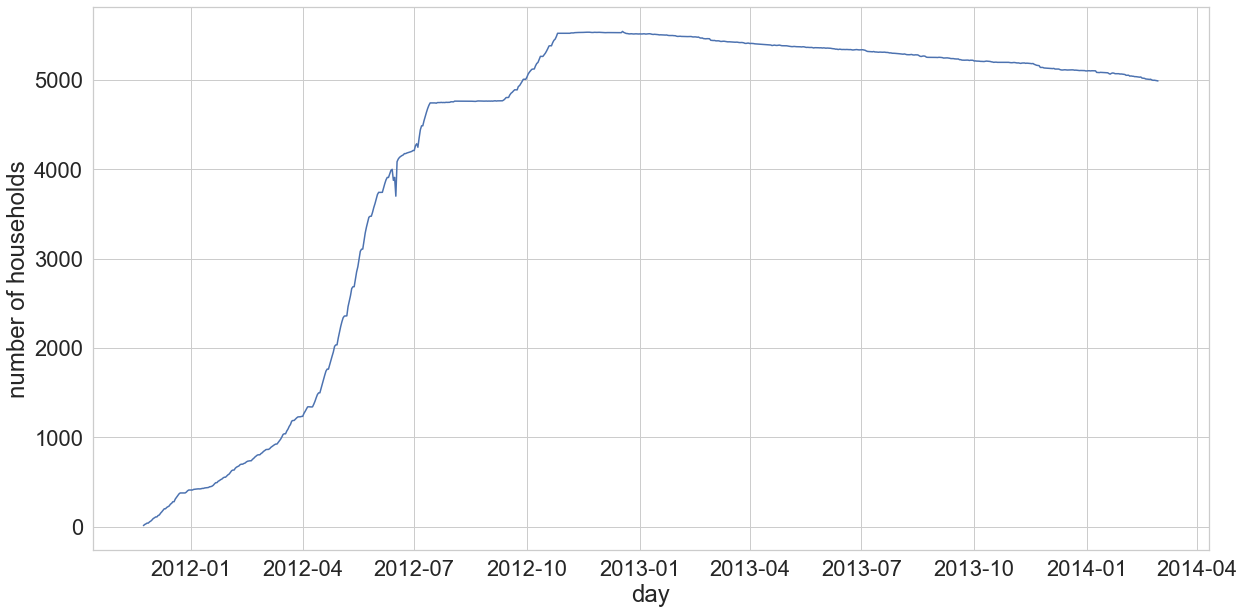

In [9]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
figure(figsize=(20,10))
sns.lineplot(data=hhs_count, x="day", y="LCLid")
plt.ylabel('number of households')
plt.show()

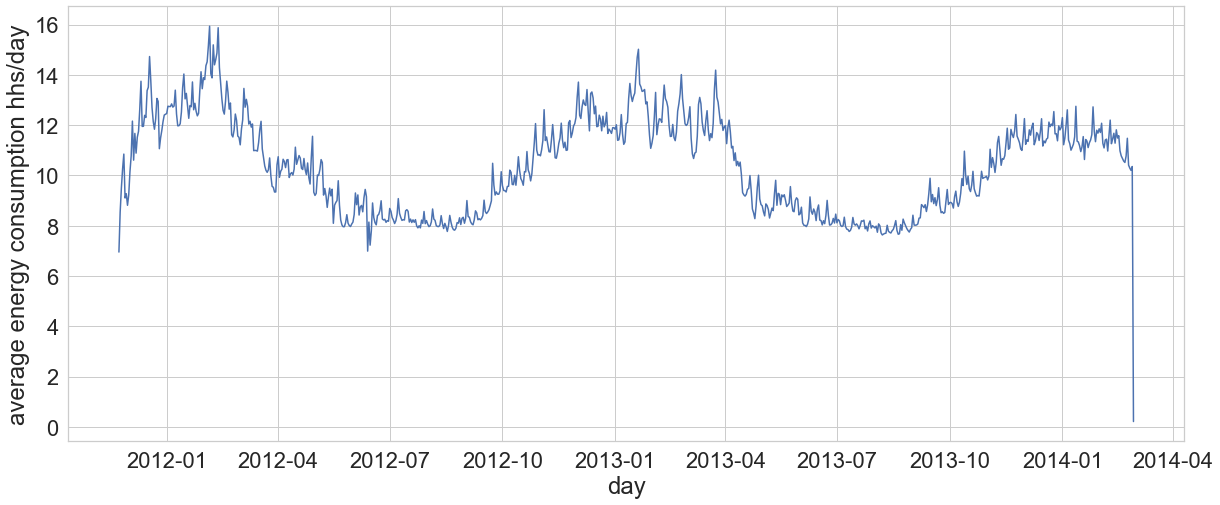

In [10]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
figure(figsize=(20,8))
sns.lineplot(data=energy_day, x="day", y="avg_energy")
plt.ylabel('average energy consumption hhs/day')
plt.show()

In [11]:
energy=pd.merge(energy, info_hhs[['LCLid', 'Acorn', 'Acorn_grouped', 'file', 'stdorToU']], on='LCLid')
energy.head(2)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Acorn,Acorn_grouped,file,stdorToU
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,ACORN-E,Affluent,block_22,Std
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,ACORN-E,Affluent,block_22,Std


In [12]:
energy_tariff=energy.groupby(['day', 'stdorToU']).energy_sum.mean().reset_index()
energy_tariff

,day,stdorToU,energy_sum
0,2011-11-23,Std,7.430000
1,2011-11-23,ToU,4.327500
2,2011-11-24,Std,8.998333
3,2011-11-24,ToU,6.111750
4,2011-11-25,Std,10.102885
...,...,...,...
1653,2014-02-26,ToU,9.716652
1654,2014-02-27,Std,10.506416
1655,2014-02-27,ToU,9.776561
1656,2014-02-28,Std,0.218075


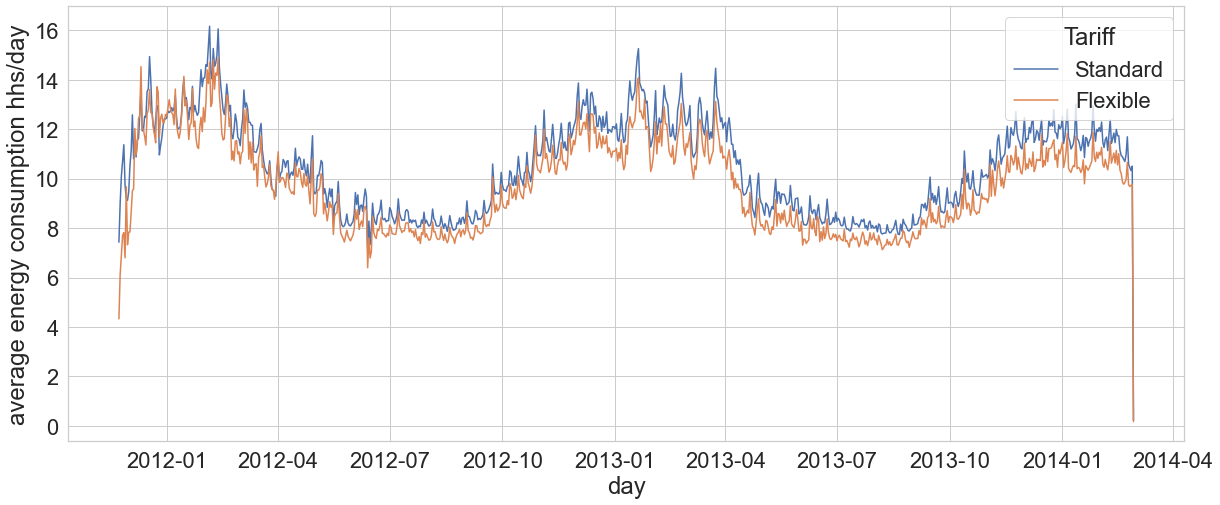

In [13]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
figure(figsize=(20,8))
sns.lineplot(data=energy_tariff, x="day", y="energy_sum", hue='stdorToU')
plt.ylabel('average energy consumption hhs/day')
plt.legend(title='Tariff', loc='upper right', labels=['Standard', 'Flexible'])
plt.show()

In [14]:
#adding the high level Acorn classification

energy_day_ACORN=energy.groupby(['day', 'Acorn_grouped']).energy_sum.mean().reset_index()
energy_day_ACORN

,day,Acorn_grouped,energy_sum
0,2011-11-23,Adversity,5.708500
1,2011-11-23,Affluent,11.551500
2,2011-11-23,Comfortable,4.680286
3,2011-11-24,Adversity,8.250750
4,2011-11-24,Affluent,10.654900
...,...,...,...
3851,2014-02-28,ACORN-,0.088000
3852,2014-02-28,ACORN-U,0.243767
3853,2014-02-28,Adversity,0.175746
3854,2014-02-28,Affluent,0.249086


In [15]:
#dropping ACORN- and ACORN-U as they have low counts, for clarity

energy_day_ACORN.drop(energy_day_ACORN[energy_day_ACORN.Acorn_grouped == 'ACORN-'].index, inplace=True)
energy_day_ACORN.drop(energy_day_ACORN[energy_day_ACORN.Acorn_grouped == 'ACORN-U'].index, inplace=True)

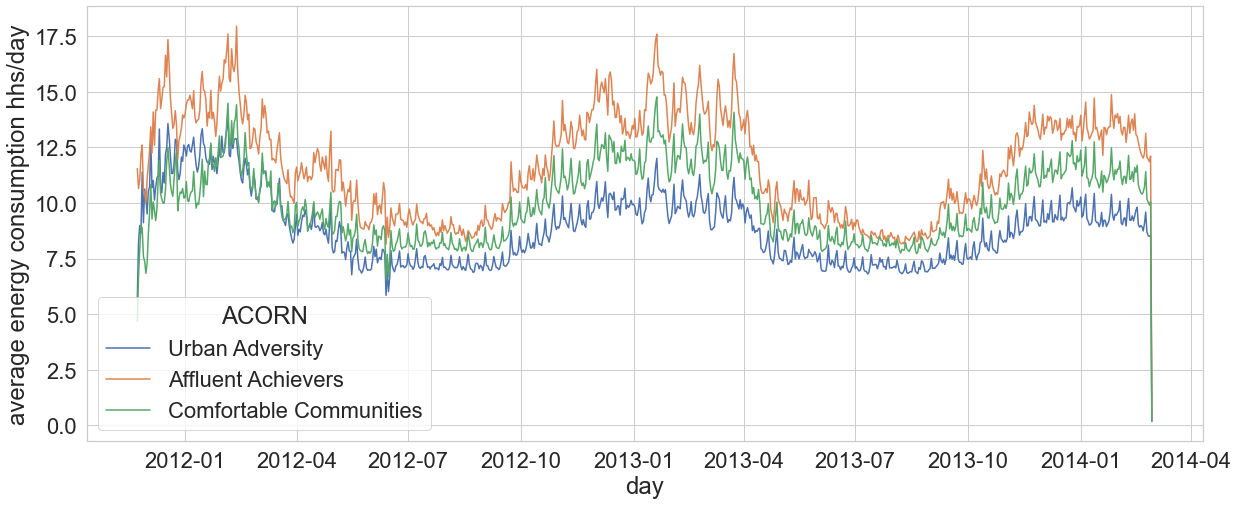

In [16]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
figure(figsize=(20,8))
sns.lineplot(data=energy_day_ACORN, x="day", y="energy_sum", hue='Acorn_grouped')
plt.ylabel('average energy consumption hhs/day')
plt.legend(title='ACORN', loc='lower left', labels=['Urban Adversity', 'Affluent Achievers', 'Comfortable Communities'])
plt.show()

In [17]:
weather = pd.read_csv('weather_daily_darksky.csv')

In [18]:
weather['temperatureMaxTime']= pd.to_datetime(weather['temperatureMaxTime'], format='%Y-%m-%d %H:%M:%S.%f')
weather['day'] = [d.date() for d in weather['temperatureMaxTime']]
weather['day'] = pd.to_datetime(weather['day'], errors='coerce')

In [19]:
weather=weather.set_index('day')

In [20]:
weather=weather[['temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']] 

In [21]:
weather_df=energy_day.merge(weather, on='day')

In [22]:
weather_df.head()

,avg_energy,temperatureMax,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,moonPhase
day,,,,,,,,,,
2011-11-23,6.952692,10.36,6.29,0.36,2.04,1027.12,8.06,0.93,1.0,0.94
2011-11-24,8.536480,12.93,8.56,0.41,4.04,1027.22,10.64,0.89,1.0,0.97
2011-11-25,9.499781,13.03,7.24,0.48,5.02,1024.47,12.38,0.79,1.0,0.01
2011-11-26,10.267707,12.96,6.96,0.44,5.75,1025.80,13.07,0.81,1.0,0.05
2011-11-27,10.850805,13.54,5.76,0.42,5.48,1021.11,13.08,0.72,1.0,0.08


<AxesSubplot:>

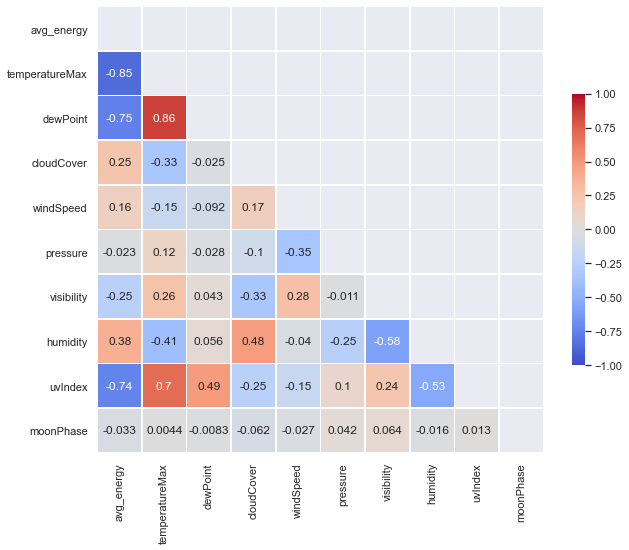

In [23]:
corr = weather_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
figure(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap="coolwarm", center=0, square=True,cbar_kws={"shrink": .5}, linewidths=.5)

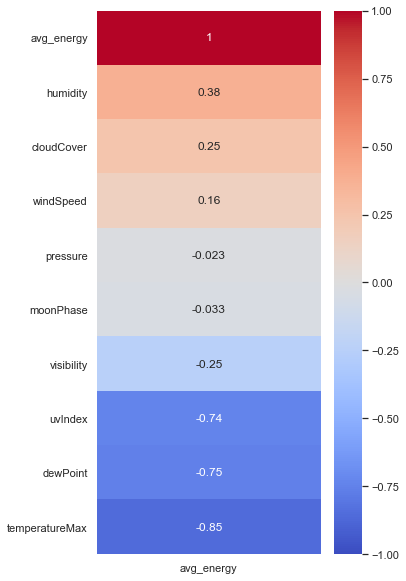

In [24]:
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(weather_df.corr()[['avg_energy']].sort_values(by='avg_energy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [25]:
energy_dmy=energy

In [26]:
energy_dmy['day'] = pd.to_datetime(energy_dmy['day'], errors='coerce')

In [27]:
energy_dmy = energy_dmy.groupby('day')[['energy_sum']].mean().reset_index()

In [28]:
energy_dmy['month'] = energy_dmy['day'].dt.month
energy_dmy['year'] = energy_dmy['day'].dt.year
energy_dmy['day_of_week'] =energy_dmy['day'].dt.dayofweek
energy_dmy.set_index(['day'], inplace=True)
energy_dmy

,energy_sum,month,year,day_of_week
day,,,,
2011-11-23,6.952692,11,2011,2
2011-11-24,8.536480,11,2011,3
2011-11-25,9.499781,11,2011,4
2011-11-26,10.267707,11,2011,5
2011-11-27,10.850805,11,2011,6
...,...,...,...,...
2014-02-24,10.411403,2,2014,0
2014-02-25,10.294997,2,2014,1
2014-02-26,10.202945,2,2014,2


In [29]:
avg_energy_pivot = pd.pivot_table(data=energy_dmy,
                    index='month',
                    values='energy_sum',
                    columns='year')
avg_energy_pivot.head()

year,2011,2012,2013,2014
month,,,,
1,NaN,12.880473,12.634319,11.533242
2,NaN,13.481452,12.384130,10.771430
3,NaN,11.170147,12.101158,NaN
4,NaN,10.368198,10.058361,NaN
5,NaN,8.972356,8.896284,NaN


<AxesSubplot:xlabel='year', ylabel='month'>

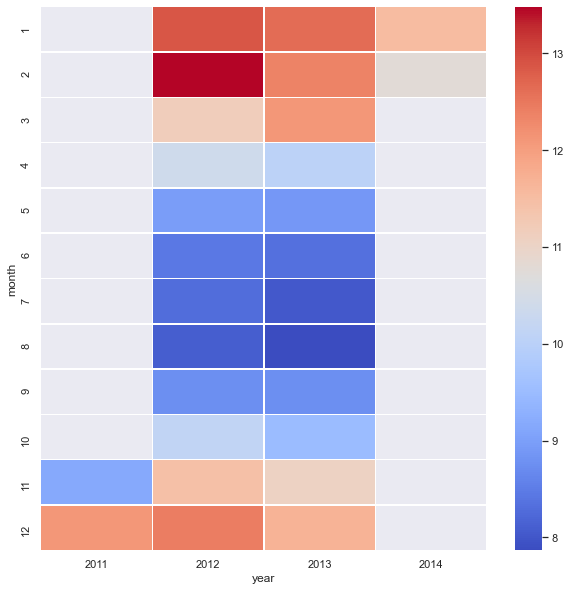

In [30]:
figure(figsize=(10,10))
sns.heatmap(avg_energy_pivot, cmap='coolwarm', linewidths=.5)

In [31]:
avg_energy_pivot_dow = pd.pivot_table(data=energy_dmy,
                    index='day_of_week',
                    values='energy_sum',
                    columns='month')
avg_energy_pivot_dow.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
0,12.392545,12.253413,11.783547,10.094501,8.956369,8.526304,8.195522,8.050542,8.721384,9.942624,10.972560,11.836657
1,12.231090,12.023215,11.542706,9.959947,8.830006,8.430703,8.128649,7.886614,8.597781,9.636626,10.883512,11.877161
2,12.028036,12.245820,11.326976,10.200619,8.735417,8.056830,8.073056,7.904246,8.579497,9.636846,10.526983,12.016798
3,11.944569,12.117572,11.112425,10.207518,8.811534,8.281260,8.016245,7.922825,8.555599,9.537922,10.771509,11.847304
4,12.202578,11.226794,11.365327,10.106181,8.869657,8.163422,8.042425,7.894181,8.605847,9.638920,10.881934,11.965106


<AxesSubplot:xlabel='month', ylabel='day_of_week'>

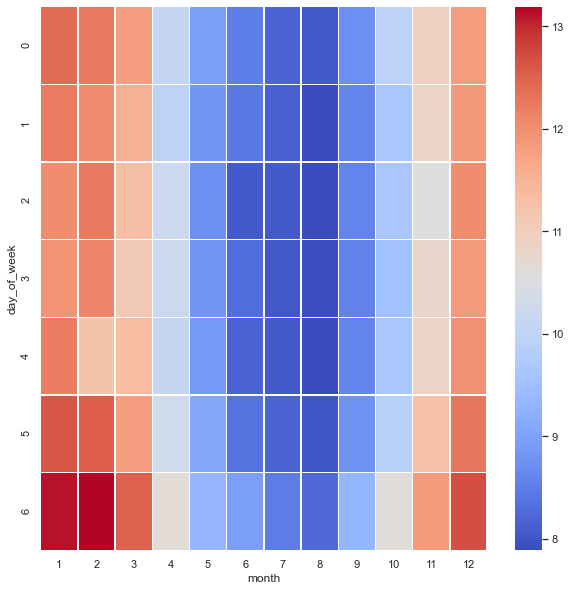

In [32]:
figure(figsize=(10,10))
sns.heatmap(avg_energy_pivot_dow, cmap='coolwarm', linewidths=.5)

In [34]:
energy_dmy.groupby('month').std()

,energy_sum,year,day_of_week
month,,,
1,0.948877,0.820922,1.991098
2,1.861425,0.823669,2.002939
3,1.075884,0.504082,1.990525
4,0.851299,0.504219,2.077251
5,0.617090,0.504082,1.945381
6,0.452851,0.504219,2.020796
7,0.249286,0.504082,2.060430
8,0.214568,0.504082,1.945381
9,0.534960,0.504219,2.077251


In [35]:
energy_dmy.groupby('day_of_week').std()

,energy_sum,month,year
day_of_week,,,
0,1.777905,3.708612,0.687895
1,1.762107,3.709071,0.687421
2,1.849853,3.701665,0.710573
3,1.757125,3.716641,0.710573
4,2.029664,3.703896,0.710573
5,1.900284,3.699695,0.700572
6,2.001125,3.708172,0.687895
